Group Assignment 2 (1 October 2021) | Adam Sahnoun, Dennis Blaufuss, Lars Wrede, Philipp Voit, Sophie Merl

Import packages

In [3]:
from time import perf_counter_ns
from random import randrange
import matplotlib.pyplot as plt
import pandas as pd

Class Node

In [4]:
class Node:
    def __init__(self, data=None):
        self.data = data
        self.next = None

    def __str__(self):
        return str(self.data)

Class LinkedList

In [5]:
class LinkedList:
    def __init__(self, data=None):
        # Tail is used in 'add' functions for faster result
        self.tail = self.head = Node(data)
        self.size = 1

    def __str__(self):
        data = ""
        current_node = self.head
        while current_node is not None:
            data += str(current_node.data) + " -> "
            current_node = current_node.next
        return data[:-4]

    def add(self, data):
        self.tail.next = Node(data)
        self.tail = self.tail.next
        self.size += 1
        return

        # Version for classic linked list (=without tail):
        new_node = Node(data)
        current = self.head
        while current.next is not None:
            current = current.next
        current.next = new_node
        self.size += 1
        return

    def at(self, index):
        if index >= self.size:
            raise Exception(f'Index {index} out of bound')
        current = self.head
        for i in range(index):
            current = current.next
        return current

    def insert(self, index, data):
        current_index = 0
        new_node = Node(data)
        current = self.head
        if index == 0:
            new_node.next = self.head
            self.head = new_node
            self.size += 1
            return
        if index == self.size:
            self.add(data)
            return
        while current.next is not None:
            if current_index == index - 1:
                temp = current.next
                current.next = new_node
                new_node.next = temp
                self.size += 1
                return
            current = current.next
            current_index += 1
        raise Exception(f'Index {index} out of bound')

    def remove(self, index):
        if index >= self.size:
            raise Exception(f'Index {index} out of bound')
        if index == 0:
            self.head = self.head.next
            self.size -= 1
            return
        current = self.head
        for i in range(index - 1):
            current = current.next
        if current.next is self.tail:
            self.tail = current
        else:
            current.next = current.next.next
        self.size -= 1
        return

    def __len__(self):
        return self.size

    def substring(self, start, end, step=None):
        if start > end:
            return "not possible"
        if step is None:
            step = 1
        end -= 1
        if end > self.size:
            end = self.size
        data = ""
        current_node = self.head
        if start > 0 and step > 0:
            i = 0
            while i < start:
                current_node = current_node.next
                i += 1
        if step > 0:
            while start < end:
                data += str(current_node.data) + " -> "
                current_node = current_node.next
                start += step
            return data[:-4]
        else:
            return "negative step is only possible in double linked list"
            # it is possible though highly inefficient (just go for dll in that case)

Input data

In [36]:
min_l = 10000     # <--- min linked list length
max_l = 20000000  # <--- max linked list length
n = 3000000       # <--- times a random object will be inserted at index 0
reps = 10         # <--- times the 'at' function will be repeated

Create data

In [37]:
data_count = []
data_time1 = []
data_time2 = []
while min_l <= max_l:
    new_lst = LinkedList()
    for j in (range(min_l)):
        new_lst.add(j)
    # timing access
    time_start1 = perf_counter_ns()
    for j in range(reps):
        new_lst.at(randrange(min_l))
    time_end1 = perf_counter_ns()
    time_span1 = time_end1 - time_start1
    time_in_sec_1 = (time_span1 / 1000000000)
    # timing insert
    data_time1.append(time_in_sec_1)
    time_start2 = perf_counter_ns()
    for j in range(n):
        new_lst.insert(0, j)
    time_end2 = perf_counter_ns()
    time_span2 = time_end2 - time_start2
    time_in_sec_2 = time_span2 / 1000000000
    data_time2.append(time_in_sec_2)
    data_count.append(min_l)
    min_l *= 2

Create dataframe

In [38]:
data = {"count": data_count,
        "time (access)": data_time1, "time (insert)": data_time2}
df = pd.DataFrame(data)

Plot Time Complexity

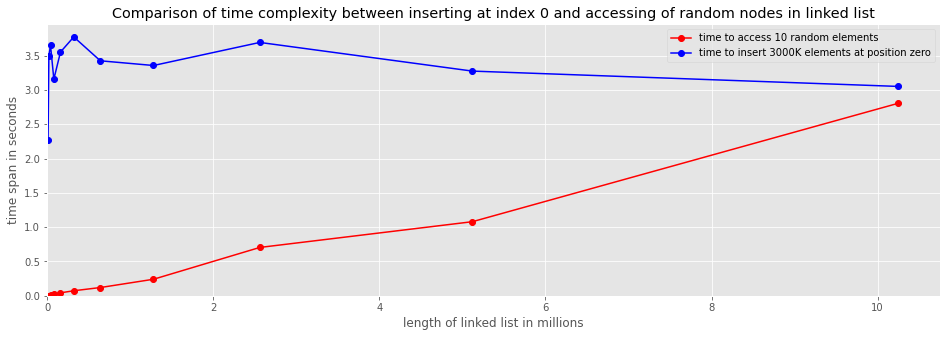

In [39]:
plt.figure(figsize=(16, 5))
plt.style.use("ggplot")
plt.plot(df["count"]/1000000, df["time (access)"],
         marker="o",
         color="red",
         label="time to access " + str(reps) + " random elements")
plt.plot(df["count"]/1000000, df["time (insert)"],
         marker="o",
         color="blue",
         label="time to insert " + str(int(n/1000)) + "K elements at position zero")
plt.legend()
# Labeling and aligning the axes to 0
plt.xlabel("length of linked list in millions")
plt.xlim(xmin=0)
plt.ylabel("time span in seconds")
plt.ylim(ymin=0)
plt.title("Comparison of time complexity between inserting at index 0 and accessing of random nodes in linked list")
plt.show()